# MUM 2023-24 Zmienne niezależne

In [1]:
%matplotlib notebook
from src.zmienne_niezalezne import *

## Zmienne losowe

* w największym skrócie - zmienna losowa (jednowymiarowa) to taki "obiekt matematyczny", który potrafi losować liczby rzeczywiste.
  * Taka zmienna ma więc przypisany do siebie rozkład prawdopodobieństwa na prostej $\mathbb{R}$.
  * Generalnie utożsamia się zmienne losowe z rozkładami prawdopodobieństwa na przestrzeniach euklidesowych.
  * Zmienne losowe z reguły oznacza się wielką literą, np. $X_1, X_2$ itd. My będziemy też używali małych liter.

* Na zmiennych losowych można wykonywać takie same działania, jak na liczbach rzeczywistych.
  * te działania opisują proces samplowania wynikowej zmiennej losowej.
  * na przykład zmienną $Y = X_1 + X_2$. Losowanie z $Y$ odbywa się następująco: najpierw losujemy przy pomocy $X_1$, potem niezależnie losujemy z $X_2$ i na końcu dodajemy do siebie dwie wylosowane liczby.

* A co dzieje się z gęstością rozkładu?
  * Jeśli np. $Y = X_1 + 5$, to gęstość $X_1$ zostanie __przesunięta__ w prawo o 5.
  * Absolutnie nie jest tak, że dodajemy 5 do funkcji gęstości! W ogólnym przypadku nie da się łatwo stwierdzić, jak wygląda gęstość $Y = X_1 + X_2$ - trzeba przeliczyć z definicji.
  * Można też wziąć funkcję $f: \mathbb{R}\to\mathbb{R}$ i zdefiniować $Y = f(X)$.
    * czyli najpierw samplujemy z $x\sim X$, a potem zwracamy $f(x)$ jako sample z $Y$.
    * Gęstość $Y$ też trzeba przeliczyć, korzystając z wzorów na $f$ oraz gęstość $X$.

* Wielowymiarowa zmienna losowa to "obiekt", który losuje wektory z przestrzeni $\mathbb{R}^D$.
  * Na takich obiektach również można wykonywać działania algebraiczne (tak jak w przestrzeniach wektorowych) oraz podstawiać je do funkcji.

## Zmienne niezależne

* Niech będzie rozkład łączny $p(x_1, x_2)$. Mówimy, że zmienne $x_1$ i $x_2$ są niezależne, jeśli: $$p(x_1, x_2) = p(x_1)p(x_2)$$
  * Oznacza to (wprost z definicji), że:
    * $p(x_1\mid x_2) = p(x_1)$
    * $p(x_2\mid x_1) = p(x_2)$

* Innymi słowy, znajomość wartości jednej z tych zmiennych nie wpływa na znajomość wartości drugiej.
  * Rozkłady warunkowe nie dodają żadnej wiedzy.
* Jeśli zmienne nie są niezależne, to mówimy, że są zależne.

<IPython.core.display.Javascript object>


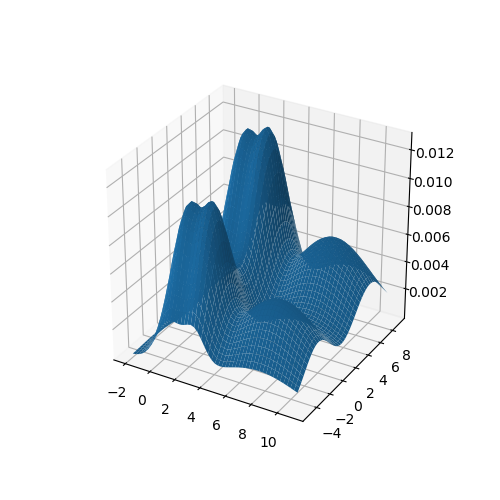

<IPython.core.display.Javascript object>


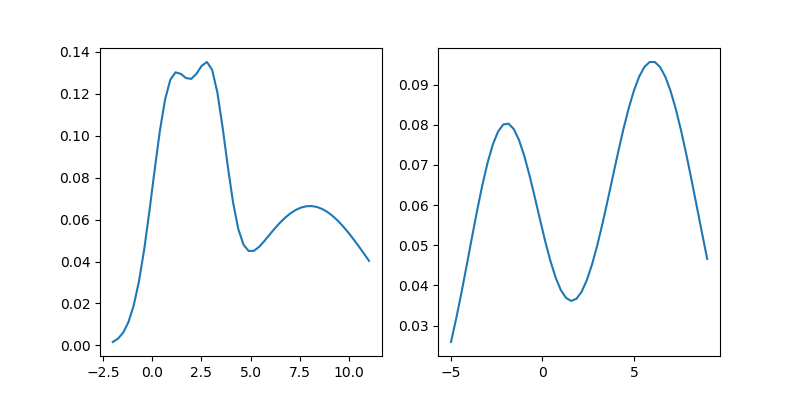

In [2]:
draw_indepentent_mixtures(
    x1_locs=[1., 3., 8.], x1_scales=[1., .8, 3.], x1_p=[.3, .2, .5],
    x2_locs=[-2., 6.], x2_scales=[2., 2.5], x2_p=[.4, .6],
)

## Rozkład warunkowo niezależny

* Musimy dołożyć trzecią zmienną. Oznaczmy ją $x_3$.

* Mówimy, że zmienne $x_1$ i $x_2$ są warunkowo niezależne pod warunkiem $x_3$, jeśli: $$p(x_1, x_2 \mid x_3) = p(x_1\mid x_3)p(x_2\mid x_3)$$
  * Innymi słowy, jeśli znamy wartość $x_3$, to znajomość wartości $x_2$ nic nam nie mówi o wartości $x_1$. Cała dostępna wiedza o $x_1$ jest już zawarta w wartości $x_3$.
  * uwaga
    * Jeśli __nie__ znamy wartości $x_3$, to znajomość wartości $x_2$ może nam coś powiedzieć o wartości $x_1$.
    * Możemy wnioskować bezpośrednio o $x_1$ lub pośrednio — najpierw wnioskując o $x_3$ na podstawie $x_2$, a następnie o $x_1$ na podstawie $x_3$ (w tym momencie wiedza o $x_2$ jest zbędna).

## Założenie I.I.D.

* Jednym z fundamentalnych założeń, na którym opiera się większość modeli ML, jest tzw. założenie **I.I.D. - _independent and identically distributed_**
  * To założenie dotyczy danych, które analizujemy.
* Załóżmy, że mamy pewien zbiór danych o rozmiarze $N$ - niech będzie to np. $N$ zdjęć kotów. 
  * każde zdjęcie jest wektorem z przestrzeni euklidesowej $\mathbb{R}^D$ - na przykład jeśli obrazki są kolorowe (3 kanały) o wymiarach 32 na 32, to formalnie każdy taki wektor ma długość 3 x 32 x 32, czyli 3072,
  * każdy taki wektor został wylosowany z pewnej zmiennej losowej,
  * żadne dwa obrazki nie są wylosowane z tej samej zmiennej losowej.
* Uwaga - jest różnica pomiędzy stwierdzeniami "te same" zmienne losowe (równość obiektów), a "takie same" zmienne losowe (równość rozkładów prawdopodobieństwa).
  * "Takie same" zmienne losowe mają "te same" rozkłady prawdopodobieństwa.
* Notacja:
  * zmienne losowe, które wygenerowały nasz zbiór danych, oznaczamy $x_1, x_2, \ldots, x_N$ (indeks dolny oznacza numer zmiennej),
  * obrazki oznaczamy $x^1, x^2, \ldots, x^N$ (indeks górny oznacza numer obrazka),
  * $k$-ty obrazek został wylosowany z $k$-tej zmiennej losowej: $x^k\sim x_k$.
* Zakładamy też, że obrazki były losowane po kolei, zgodnie z numeracją indeksów.
* Założenie I.I.D. oznacza, że istnieje pewien "prawdziwy" rozkład zdefiniowany dodatkową zmienną $x$, który jest równy rozkładom wszystkich $N$ zmiennych losowych.
  * W tym sensie można myśleć, że obrazki $x^1, x^2, \ldots, x^N$ to $N$ __niezależnych__ (_independent_) sampli __z tego samego rozkładu $x$__ (_identically distributed_).
* Formalnie
  * $p(x_1=x^1, x_2=x^2, \ldots, x_N=x^N)$ - prawdopodobieństwo __całego zbioru treningowego__
  * $p(x_1=x^1, x_2=x^2, \ldots, x_N=x^N) = p(x_1=x^1)p(x_2=x^2) \ldots p(x_N=x^N)$ - "_independent_", wiedza o wartości $k$-tego obrazka nie mówi nic o wartości $j$-tego obrazka, jeśli $k\neq j$.
  * $p(x_1=x^1)p(x_2=x^2) \ldots p(x_N=x^N)$ = $p(x=x^1)p(x=x^2) \ldots p(x=x^N)$ - "_identically distributed_", dzięki "powtarzalności" procesu generowania danych możemy w ogóle cokolwiek wnioskować o przyszłych samplach.


### Pytanie

* Uczenie modelu polega na tym, że próbujemy użyć wiedzy zdobytej na zbiorze treningowym do wnioskowania o nowych danych.
* Niech $x^1, x^2, \ldots, x^N$ to będzie nasz zbiór treningowy złożony z $N$ obrazków, a $x^{N+1}$ będzie nowym obrazkiem ze zbioru testowego, którego nie widzieliśmy podczas uczenia.
* Zgodnie z założeniem I.I.D. mamy:
$$p(x_{N+1}=x^{N+1}\mid x_1=x^1, x_2=x^2, \ldots, x_N=x^N) = p(x_{N+1}=x^{N+1}) = p(x = x^{N+1})$$

* Innymi słowy, zbiór treningowy nie daje nam żadnej nowej wiedzy na temat punktów ze zbioru testowego.
  * Ale przecież to stoi w sprzeczności z faktem, że modele się __uczą__.
  * Jak to wytłumaczyć?